In [5]:
import pandas as pd
import sys
sys.path.append('../')
from timeline_generator import get_timeline

### Concepts

Two key concepts of the timeline_generator are _milestones_ and _spans_

- Milestone: A single point in time. By default, milestones are rendered with a marker, a vertical line descending to the x-axis, and a description (annotation).
- Span: An event that has a start and end time. Spans are rendered with a horizontal line and a description (annotation)

The only different between a milestone and a span in the input data is that milestones have no end date.

Both milestones and spans have a `height`. This determines where they are placed on the y-axis.

### Creating a timeline DataFrame

The timeline generator takes a pandas DataFrame as input. The DataFrame can be read from a CSV file, or created in code as shown below. There are _many_ ways to create a pandas DataFrame.  The Timeline DataFrame should have the following columns:

- start: A timestamp indicating the location of the milestone or the start of the span.  Any string parse-able by [`pandas.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) is valid.
- end: A timestamp indicating the end of the span. For milestones, this should be an empty string
- description: The text (annotation) that appears next to the milestone or span
- height: The location of the milestone or span on the vertical axis
- options: A dictionary of options
  - `text_width`: Number of characters before wrapping the description.  Default = `50`
  - `x_offset`: Horizontal distance in pixels between the milestone marker and the start of the label. Default = `10`.
  - `y_offset`: Vertical distance in pixels between the milestone marker and the start of the label. Default = `10`. 
  - `arrowprops`: A Dict describing the arrow between the text and the marker.  See [pyplot.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) for details.
  - `horizontalalignment`: Default is `left`.
  - `annotation_anchor`: Allowed values:
    - `left`: The annotation is anchored at the _start_ time of the span. This is the default
    - `right`: The annotation is anchored at the _end_ time of the span
    - `start`: The annotation is anchored at the earliest time of the displayed chart
    - `end`: The annotation is anchored at the latest time of the displayed chart
  - `marker`: Use `False` to hide a milestone marker.  Default is `True`.
  - `vline`: use `False` to hide the vertical line descending from a milestone marker. Default is `True`.
  - `color`: Any color value understood by matplotlib.  See [specifying colors](https://matplotlib.org/stable/tutorials/colors/colors.html)
  - `alpha`: A transparency value from 0-1, where 0 is 100% transparent.  Default is `1`

In [6]:
data = [
    ['08/21/2022','','this is a milestone',5,{}],
    ['2022-08-21 08:00','','this is another milestone',4,{}],
    ['2022-08-21 10:00','','this is a milestone with a very, very long description that ' \
    'we will want to wrap into multiple lines',3,{'text_wrap':30}],
    ['2022-08-20 12:00','2022-08-22 12:00','this is a "span", indicating an activity that ocurrs over a period of time',6,{
        'text_wrap':300,'color':'red','alpha':0.5
        }
    ],
    ['2022-08-21 12:00','2022-08-21 23:00','another span',7,{'color':'yellow'}],
    ['2022-08-22 12:00', '', 'something interesting happens here (a milestone without a vertical line)', 6, {
        'vline':False,'y_offset':-30,'x_offset':-40,'color':'green', 'arrowprops':{
             'arrowstyle':'->','connectionstyle':'arc3,rad=0.1','shrinkB':5
            }
        }
    ],
    ['2022-08-22 16:00','','Something happens later',2,{}]
]
d = pd.DataFrame(data,columns=['start','end','description','height','options'])

### Creating the timeline

The `get_timeline` method is called with the timeline DataFrame as input as shown below.  Use the optional `filename` parameter to save the chart to a file.

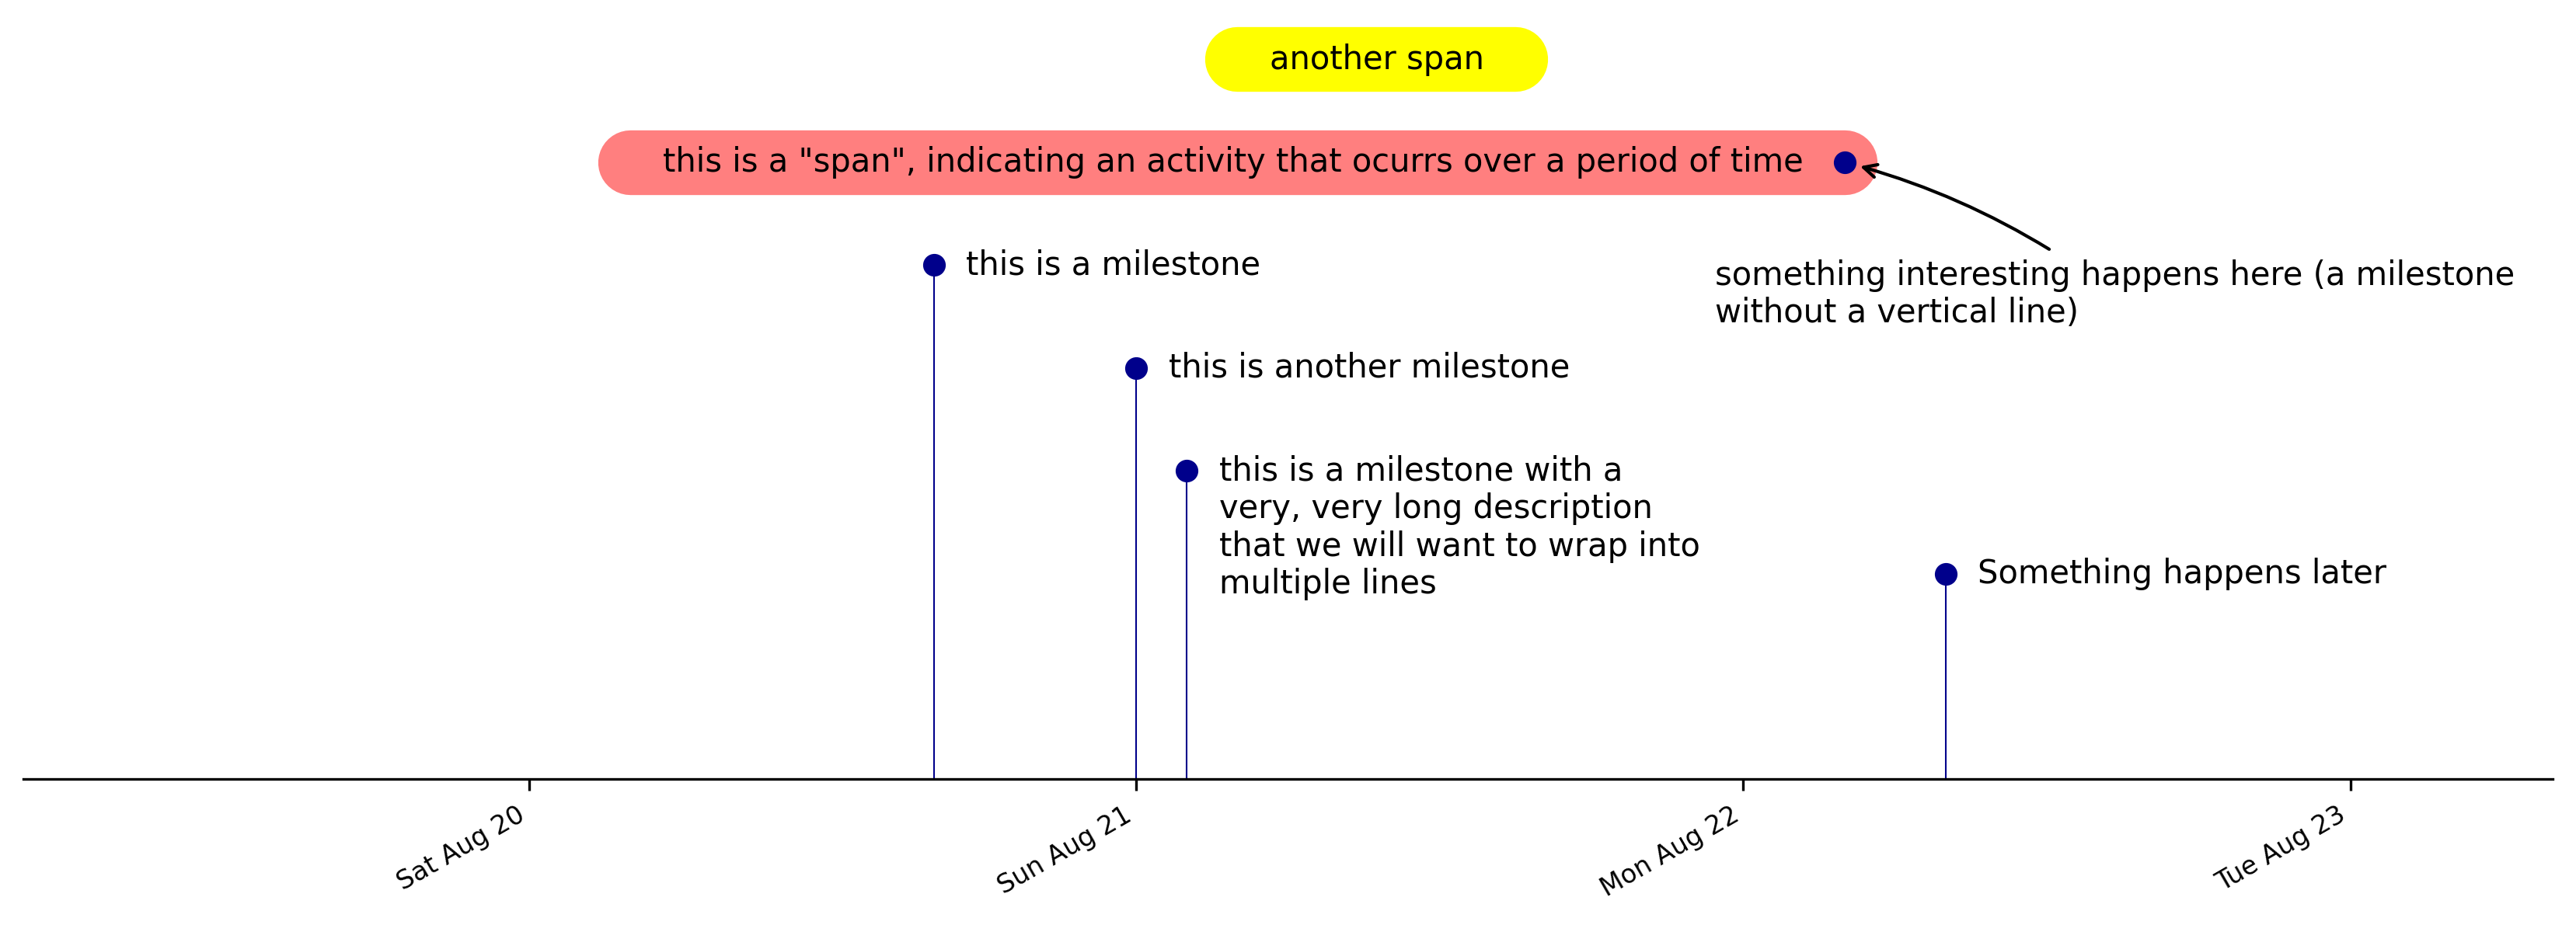

In [7]:
ax=get_timeline(d, filename='timeline-1.png')

### Further Customization 

Below, we use the same timeline DataFrame to generate a timeline covering 5 hours on Aug 21. It is common that different customizations are needed to make nice-looking graphs at different time scales. In this example: 

- We change the options for the span so that the text appears in the middle of the chart. `annotation_anchor='start'` indicates that the annotation should be anchored at the start of the x-axis, instead of the start of the span.
- We move the description of the second milestone so that it is right justified and appears to the left of the marker.
- We hide the marker for the last milestone, anchor it at the `end` of the x-axis, and add an arrow pointing to the future.
- `interval=1` indicates that x-ticks should be displayed at each hour (default is every 24 hours)
- `dateformat` is used to customize the x-ticks using [`strptime` format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes). The default is "`%a %b %d`" (dow mon day)

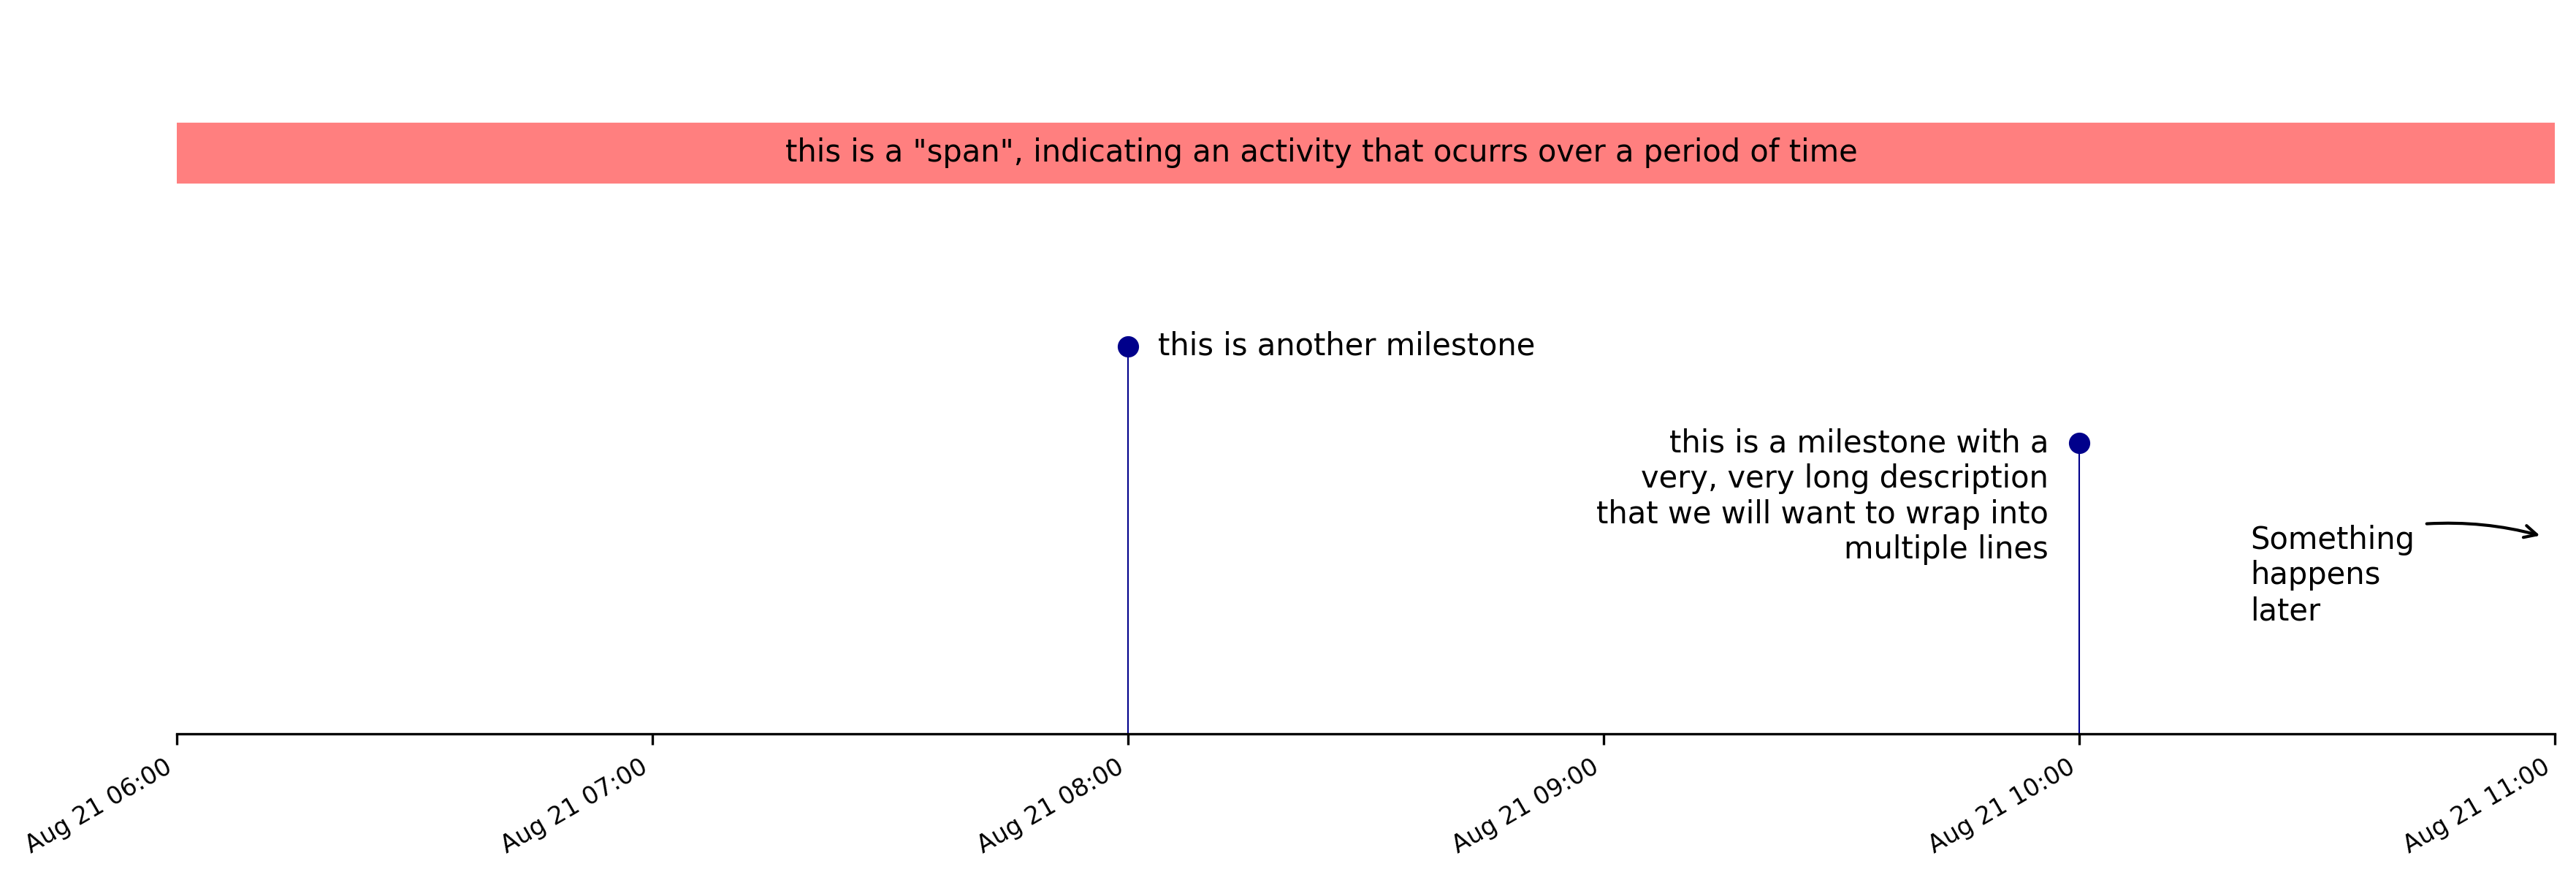

In [8]:
d.at[3,'options'].update({'annotation_anchor':'start','x_offset':200})
d.at[2,'options'].update({'horizontalalignment':'right','x_offset':-10})
d.at[6,'options'].update({
    'marker':False,'annotation_anchor':'end','text_wrap':10,'x_offset':-100,
    'arrowprops':{
            'arrowstyle':'->','shrinkB':5,'relpos':(1,1),'connectionstyle':'arc3,rad=-0.1'
    }
})
ax=get_timeline(d,start='2022-08-21 06:00', end='2022-08-21 11:00',interval=1,dateformat='%b %d %H:%M')